# Final Evaluation
## Problem 3.

#### Loading the packages and reading the data.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv('problem3.csv', index_col=0, header=None).T
data

,x_age,x_cholesterol,x_sugar,x_Tcell,y
1,35,220,80,550,0
2,18,240,120,600,0
3,22,260,55,580,0
4,23,220,75,575,0
5,28,180,100,620,0
6,38,280,74,674,0
7,40,235,175,275,1
8,25,200,180,180,1
9,35,150,240,140,1
10,34,280,130,80,1


Because the target feature is binary, we choose a Logistic Regression model to decide what measuremente can be used as a marker. 

In [4]:
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')

We define a function in order to apply the model with each measure and graph the corresponding results.

In [5]:
def model_sim(dfx):
    x_train, x_test, y_train, y_test = train_test_split(dfx, data.y, test_size=0.3, random_state=5)
    x_train = np.array(x_train).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    model.fit(x_train, y_train)
    model.score(x_train, y_train)
    X = np.arange(min(dfx)-10, max(dfx)+10, 0.1)
    X = X.reshape(-1, 1)
    plt.scatter(x_train, y_train)
    plt.scatter(X,model.predict_proba(X)[:,1],marker='.',color='g',linewidth=.1)
    plt.title("Logistic Regression Model")
    plt.xlabel('X')
    #plt.ylabel('Age')
    print('Score: {}'.format(model.score(x_train, y_train))
         ,'Intercept: {}'.format(model.intercept_)
         ,'Coefficient: {}'.format(model.coef_) ,sep= "\n")

#### Results of the model using the age measure.

Score: 0.5
Intercept: [-2.09950044]
Coefficient: [[0.07509664]]


D:\Anaconda\envs\Ambiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


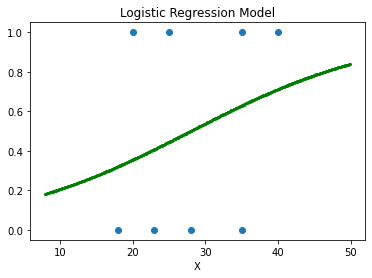

In [6]:
model_sim(data.x_age)

Clearly the age measure does not work as a marker.

#### Results of the model using the cholesterol measure.

Score: 0.625
Intercept: [1.50771544]
Coefficient: [[-0.00722093]]


D:\Anaconda\envs\Ambiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


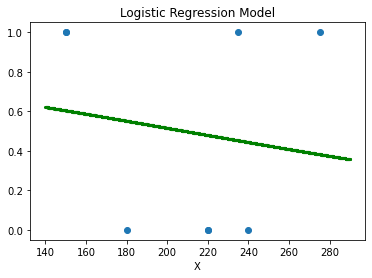

In [7]:
model_sim(data.x_cholesterol)

Neither the cholesterol works.

#### Results of the model using the sugar measure.

Score: 1.0
Intercept: [-87.67981786]
Coefficient: [[0.7157536]]


D:\Anaconda\envs\Ambiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


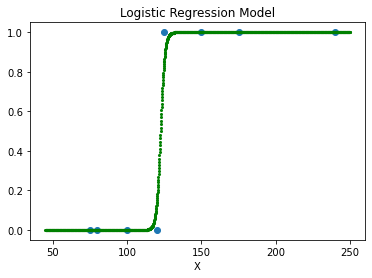

In [8]:
model_sim(data.x_sugar)

This seems better than the last two.

Score: 1.0
Intercept: [31.70077079]
Coefficient: [[-0.07262875]]


D:\Anaconda\envs\Ambiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


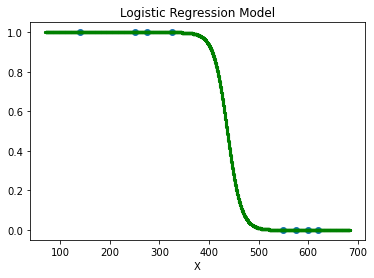

In [9]:
model_sim(data.x_Tcell)

The Tcell measure definetly is the best to use as a marker.

## Testing the model

Define a function to compare the prediction of the models using the sugar and Tcell measures using the testing data.

In [10]:
def model_pred(dfx):
    x_train, x_test, y_train, y_test = train_test_split(dfx, data.y, test_size=0.3, random_state=5)
    x_train = np.array(x_train).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    model.fit(x_train, y_train)
    model.score(x_train, y_train)
    return(np.ravel(x_test),np.ravel(y_test),np.ravel(model.predict(x_test)))

In [11]:
columns = ["x_test_Tcell", "y_test", "y_prediction"]
df = pd.DataFrame(np.array(model_pred(data.x_Tcell)).T, columns=columns)
df

D:\Anaconda\envs\Ambiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,x_test_Tcell,y_test,y_prediction
0,180,1,1
1,674,0,0
2,580,0,0
3,80,1,1


In [12]:
columns = ["x_test_sugar", "y_test", "y_prediction"]
df = pd.DataFrame(np.array(model_pred(data.x_sugar)).T, columns=columns)
df

D:\Anaconda\envs\Ambiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,x_test_sugar,y_test,y_prediction
0,180,1,1
1,74,0,0
2,55,0,0
3,130,1,1


## ROC curve and AUC

### Tcell marker

In [13]:
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
xt_train, xt_test, yt_train, yt_test = train_test_split(data.x_Tcell, data.y, test_size=0.3, random_state=5)
xt_train = np.array(xt_train).reshape(-1, 1)
yt_train = np.array(yt_train).reshape(-1, 1)
xt_test = np.array(xt_test).reshape(-1, 1)
yt_test = np.array(yt_test).reshape(-1, 1)
x_tcell = np.array(data.x_Tcell).reshape(-1, 1)
y = np.array(data.y).reshape(-1, 1)

In [14]:
model.fit(xt_train, yt_train)
model.predict(xt_test)

D:\Anaconda\envs\Ambiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 0, 0, 1], dtype=int64)

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [16]:
ns_probs = [0 for _ in range(len(y))]
# predict probabilities
lr_probs = model.predict_proba(x_tcell)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [17]:
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =1.000


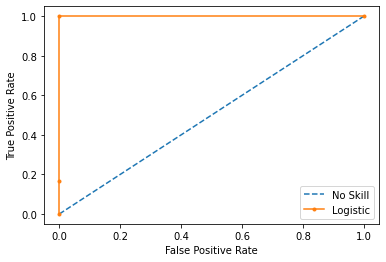

In [18]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Sugar Marker

In [19]:
model1 = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
xs_train, xs_test, ys_train, ys_test = train_test_split(data.x_sugar, data.y, test_size=0.3, random_state=5)
xs_train = np.array(xs_train).reshape(-1, 1)
ys_train = np.array(ys_train).reshape(-1, 1)
xs_test = np.array(xs_test).reshape(-1, 1)
ys_test = np.array(ys_test).reshape(-1, 1)
x_sugar = np.array(data.x_Tcell).reshape(-1, 1)

In [20]:
model1.fit(xs_train, ys_train)
model1.predict(xs_test)

D:\Anaconda\envs\Ambiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 0, 0, 1], dtype=int64)

In [21]:
ns_probs = [0 for _ in range(len(y))]
# predict probabilities
lr_probs = model1.predict_proba(x_sugar)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [22]:
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.333


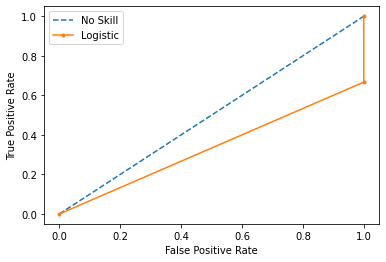

In [23]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The sugar marker seems to be worse than the Tcell marker, in fact the Tcell marker works very well because the AUC is ideal.

Finally, we can conclude that a criteria to predict the progression of the disease is the measure of Tcells. 

In [24]:
Intercept = 31.70077079
Coefficient = -0.07262875
Criteria = Intercept/-Coefficient
Criteria

436.4768881469115

If it is less than 436.4768 we can conlude that patient is in critical condition. On the other hand, if is greater than 436.4768, then the disease is not progressing.